In [5]:
pip install missingno
##Missingno is a Python library that provides the ability to understand
#the distribution of missing values through informative visualizations. 

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas_profiling

In [10]:
pip install pandas-profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
Processing c:\users\rishi\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243\htmlmin-0.1.12-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install plotly-express

In [16]:
import plotly.express as px

In [45]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn import ensemble, tree, linear_model, preprocessing 
import missingno 
import missingno as msno

In [46]:
District_wise = pd.read_csv(r'F:\Feynn labs\New folder\data\2015_16_Districtwise.csv')
State_wise_elementry = pd.read_csv(r'F:\Feynn labs\New folder\data\2015_16_Statewise_Elementary.csv')
State_wise_secondary = pd.read_csv(r'F:\Feynn labs\New folder\data\2015_16_Statewise_Secondary.csv')

In [47]:
District_wise_met = pd.read_csv(r'F:\Feynn labs\New folder\data\2015_16_Districtwise_Metadata.csv')
State_wise_elementry_met = pd.read_csv(r'F:\Feynn labs\New folder\data\2015_16_Statewise_Elementary_Metadata.csv')
State_wise_secondary_met = pd.read_csv(r'F:\Feynn labs\New folder\data\2015_16_Statewise_Secondary_Metadata.csv')

In [48]:
District_wise.head()

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,7408,17,855,1688,2584,151,67,5,1101,209


In [49]:
District_wise_total = pd.DataFrame()

In [50]:
i=0
for name in District_wise_met['Description']:
    if 'Total' in name:
        District_wise_total[District_wise_met.iloc[i][1]] = District_wise[District_wise_met.iloc[i][0]]
    i=i+1

In [51]:
District_wise_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 90 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Basic_data_from_Census_2011: Total_Population(in_1000's)                                                    634 non-null    float64
 1   Schools_By_Category: Total                                                                                  680 non-null    int64  
 2   Schools_by_Category:_Government: Total                                                                      680 non-null    int64  
 3   Schools_by_Category:_Private_: Total                                                                        680 non-null    int64  
 4   Schools_by_Category:_Madarsas_&_Unrecognised: Total                 

In [52]:
District_wise_fac = pd.DataFrame()
for name in District_wise_total.columns[21:31]:
    
    District_wise_fac[name] = District_wise_total[name]

In [53]:
District_wise_fac.head()

,Schools_Approachable_by_All_Weather_Road: Total,Schools_with_Playground_Facility: Total,Schools_with_Boundarywall: Total,Schools_with_Girls'_Toilet: Total,Schools_with_Boys'_Toilet: Total,Schools_with_Drinking_Water: Total,Schools_with_Electricity: Total,Schools_with_Computer: Total,Schools_with_Ramp_(where_needed): Total,Schools_where_Ramp_is_Required: Total
0,1611,424,560,1897,1686,1678,189,173,578,674
1,2071,761,595,2296,2276,2109,818,269,282,386
2,967,607,836,843,917,970,605,498,58,221
3,1438,490,520,1459,1448,1468,250,215,259,447
4,965,367,435,889,835,989,225,196,150,313


In [54]:
District_wise_fac['Fraction_of_ramp'] = District_wise_fac['Schools_with_Ramp_(where_needed): Total']/District_wise_fac['Schools_where_Ramp_is_Required: Total']

ADD a new column fraction_of_ramp


In [55]:
District_wise_fac.drop(['Schools_with_Ramp_(where_needed): Total','Schools_where_Ramp_is_Required: Total'], axis=1, inplace=True)

In [41]:
District_wise_fac.head()

,Schools_Approachable_by_All_Weather_Road: Total,Schools_with_Playground_Facility: Total,Schools_with_Boundarywall: Total,Schools_with_Girls'_Toilet: Total,Schools_with_Drinking_Water: Total,Schools_with_Electricity: Total,Schools_with_Computer: Total,Population_per_school
0,1611,424,560,1897,1678,189,173,421.755299
1,2071,761,595,2296,2109,818,269,439.611688
2,967,607,836,843,970,605,498,1289.087310
3,1438,490,520,1459,1468,250,215,501.194142
4,965,367,435,889,989,225,196,554.533074


In [56]:
District_wise_fac['Population_per_school'] = District_wise_total['Basic_data_from_Census_2011: Total_Population(in_1000\'s)']/District_wise_total['Schools_By_Category: Total']

In [57]:
District_wise_fac.drop('Schools_with_Boys\'_Toilet: Total', axis=1, inplace = True)

array([[<AxesSubplot:xlabel='Schools_Approachable_by_All_Weather_Road: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Playground_Facility: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Boundarywall: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel="Schools_with_Girls'_Toilet: Total", ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Drinking_Water: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Electricity: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Computer: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Fraction_of_ramp', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <Axe

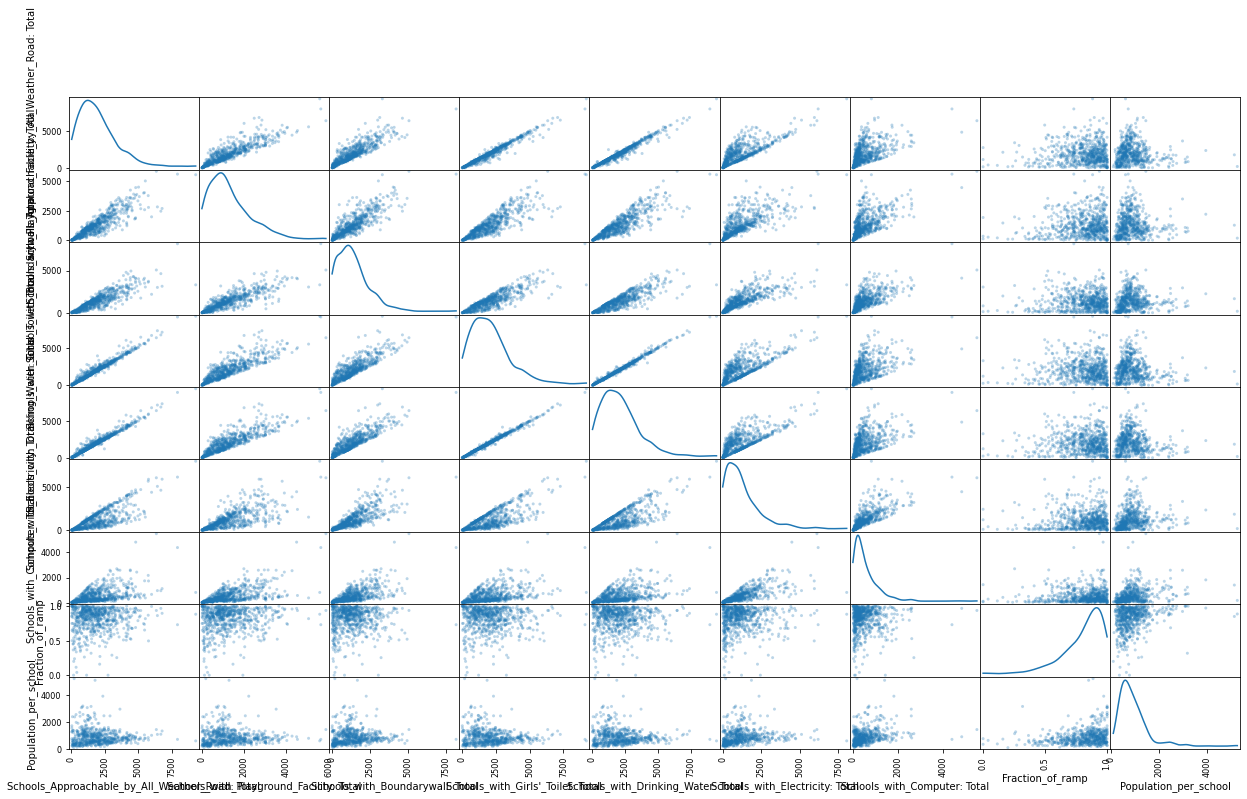

In [58]:
pd.plotting.scatter_matrix(District_wise_fac, alpha = 0.3, figsize = (21,12), diagonal = 'kde')

In [59]:
Ramp = District_wise_fac['Fraction_of_ramp']

In [60]:
District_wise_fac.drop('Fraction_of_ramp', axis=1, inplace=True)

In [ ]:
for name in District_wise_fac.columns:
    District_wise_fac[name]=np.log(District_wise_fac[name])

In [61]:
Ramp = np.arcsin(Ramp)

C:\Users\rishi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fraction_of_ramp'>

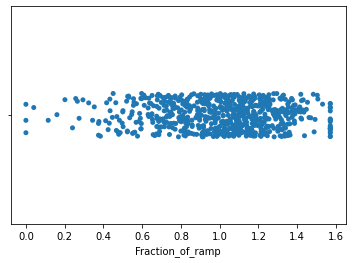

In [62]:
sns.stripplot(Ramp)

In [63]:
District_wise_fac['Fraction_needed_ramp_give'] = Ramp

array([[<AxesSubplot:xlabel='Schools_Approachable_by_All_Weather_Road: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Playground_Facility: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Boundarywall: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel="Schools_with_Girls'_Toilet: Total", ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Drinking_Water: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Electricity: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Computer: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Population_per_school', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
       

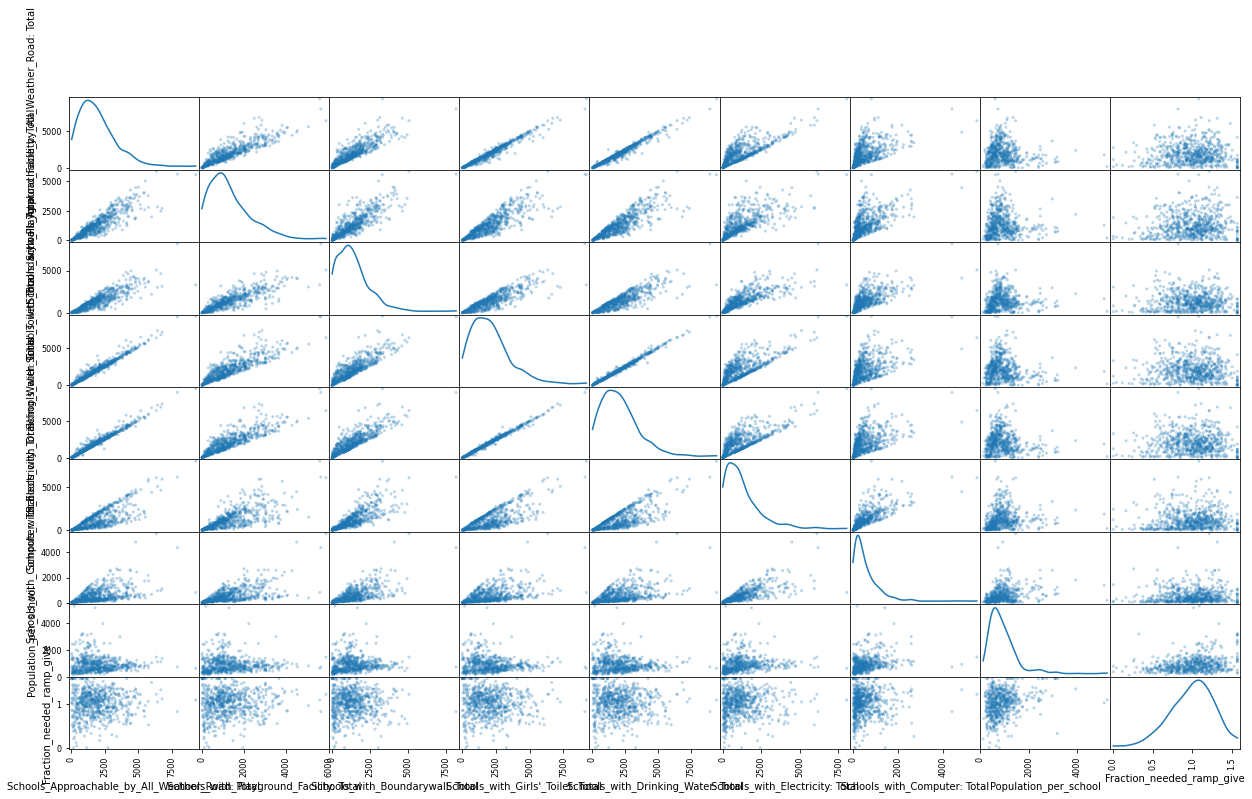

In [64]:
pd.plotting.scatter_matrix(District_wise_fac, alpha = 0.3, figsize = (21,12), diagonal = 'kde')

In [66]:
std_scale = preprocessing.StandardScaler().fit(District_wise_fac)
df_std = std_scale.transform(District_wise_fac)
df_std

array([[-0.21835936, -0.89416016, -0.79115691, ..., -0.66830273,
        -0.8290858 ,  0.11380184],
       [ 0.12823049, -0.54637717, -0.75652093, ..., -0.49963415,
        -0.79848238, -0.62376564],
       [-0.70358515, -0.70530471, -0.51802753, ..., -0.09728932,
         0.65740317, -2.55559485],
       ...,
       [ 1.63664978,  1.65900047,  1.77388421, ...,  1.30476823,
        -0.14278353, -1.40258375],
       [ 1.74288711,  1.66932044,  1.68185148, ...,  1.20637823,
        -0.17353062, -1.25562081],
       [ 0.99244474,  1.30502549,  1.24840704, ...,  0.43331392,
        -0.17342952, -0.17434497]])

In [67]:
df_std[:,0]

array([-0.21835936,  0.12823049, -0.70358515, -0.34870728, -0.70509206,
       -0.13321881, -1.16997453, -1.01551601, -0.61995151, -0.64180174,
       -0.70132478, -0.47152064,  0.21638486, -0.44288931, -0.96352753,
       -0.82263123, -0.9778432 , -0.96880173, -0.96503445, -0.87009897,
       -1.07127177, -0.98763813, -0.56796303,  0.68578807, -1.30333628,
       -0.84071417,  0.17193095, -0.72769575, -0.80228791, -0.7834515 ,
       -0.57625105, -0.57775796,  0.5855784 , -1.20161969,  0.18624661,
        0.2276867 , -0.62823953,  0.2450162 ,  0.29022357, -0.81509666,
       -0.66817271, -0.80454828,  0.78223046, -0.78646533, -0.59207363,
       -0.84674182, -1.01024182, -0.66515888, -0.92208744, -0.25678563,
        0.10110606, -0.66515888, -0.55515428, -1.07805288, -0.63200681,
       -0.82790542, -1.28073259, -0.80304137, -0.52350912, -0.80530173,
       -0.06390084,  0.08076275, -0.06540775, -0.30123954, -0.94017039,
       -0.3261036 , -0.9590068 , -0.19500222,  0.07850238, -0.07

In [68]:
District_wise_scaled = pd.DataFrame()

In [69]:
i=0
for name in District_wise_fac.columns:
    District_wise_scaled[name] = df_std[:,i]
    i=i+1

In [70]:
District_wise_scaled.head()

,Schools_Approachable_by_All_Weather_Road: Total,Schools_with_Playground_Facility: Total,Schools_with_Boundarywall: Total,Schools_with_Girls'_Toilet: Total,Schools_with_Drinking_Water: Total,Schools_with_Electricity: Total,Schools_with_Computer: Total,Population_per_school,Fraction_needed_ramp_give
0,-0.218359,-0.894160,-0.791157,-0.115194,-0.274531,-0.937279,-0.668303,-0.829086,0.113802
1,0.128230,-0.546377,-0.756521,0.171088,0.033680,-0.365707,-0.499634,-0.798482,-0.623766
2,-0.703585,-0.705305,-0.518028,-0.871438,-0.780826,-0.559260,-0.097289,0.657403,-2.555595
3,-0.348707,-0.826048,-0.830741,-0.429459,-0.424703,-0.881849,-0.594510,-0.692938,-1.325660
4,-0.705092,-0.952984,-0.914857,-0.838433,-0.767239,-0.904566,-0.627893,-0.601523,-1.738245


array([[<AxesSubplot:xlabel='Schools_Approachable_by_All_Weather_Road: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Playground_Facility: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Boundarywall: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel="Schools_with_Girls'_Toilet: Total", ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Drinking_Water: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Electricity: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Schools_with_Computer: Total', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
        <AxesSubplot:xlabel='Population_per_school', ylabel='Schools_Approachable_by_All_Weather_Road: Total'>,
       

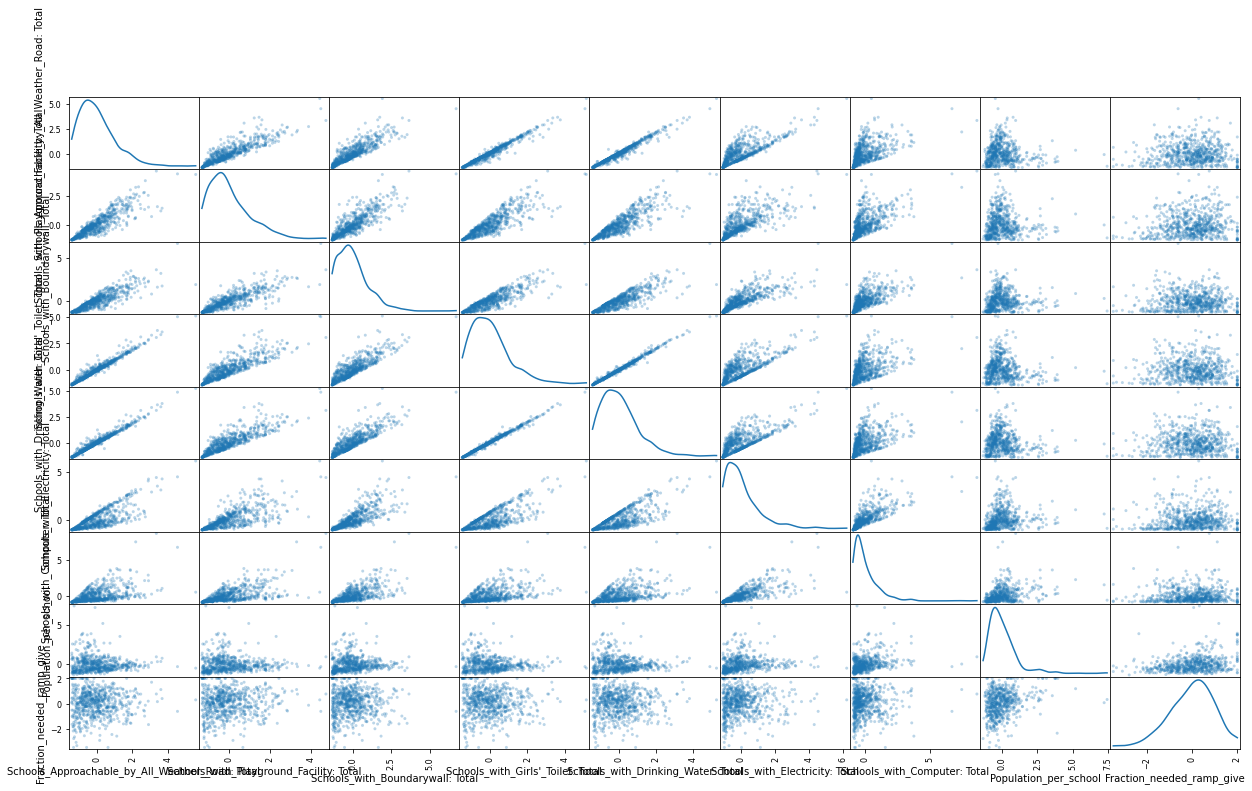

In [71]:
pd.plotting.scatter_matrix(District_wise_scaled, alpha = 0.3, figsize = (21,12), diagonal = 'kde')

In [72]:
District_wise_scaled.describe()

,Schools_Approachable_by_All_Weather_Road: Total,Schools_with_Playground_Facility: Total,Schools_with_Boundarywall: Total,Schools_with_Girls'_Toilet: Total,Schools_with_Drinking_Water: Total,Schools_with_Electricity: Total,Schools_with_Computer: Total,Population_per_school,Fraction_needed_ramp_give
count,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.340000e+02,6.800000e+02
mean,-5.469481e-17,8.979745e-17,1.358391e-16,-1.005731e-16,-1.611456e-16,-4.538853e-17,-8.489941e-17,-4.552965e-17,3.265362e-19
std,1.000736e+00,1.000736e+00,1.000736e+00,1.000736e+00,1.000736e+00,1.000736e+00,1.000736e+00,1.000790e+00,1.000736e+00
min,-1.417108e+00,-1.328631e+00,-1.325540e+00,-1.455482e+00,-1.455887e+00,-1.099937e+00,-9.582018e-01,-1.357548e+00,-3.482260e+00
25%,-7.357954e-01,-7.372966e-01,-7.337602e-01,-7.483869e-01,-7.388136e-01,-7.346395e-01,-6.568825e-01,-6.593277e-01,-6.239029e-01
50%,-1.757891e-01,-2.383261e-01,-1.686990e-01,-1.503518e-01,-1.325819e-01,-2.507570e-01,-3.125174e-01,-2.139167e-01,9.864877e-02
75%,5.266204e-01,5.395417e-01,5.029914e-01,5.050831e-01,5.385459e-01,3.994175e-01,3.318492e-01,3.621940e-01,6.861743e-01
max,5.563663e+00,4.717840e+00,6.722870e+00,5.119675e+00,5.278274e+00,6.195103e+00,8.645365e+00,7.441059e+00,1.999127e+00


In [73]:
District_wise_scaled = District_wise_scaled[District_wise_scaled['Population_per_school'].notna()]

<AxesSubplot:>

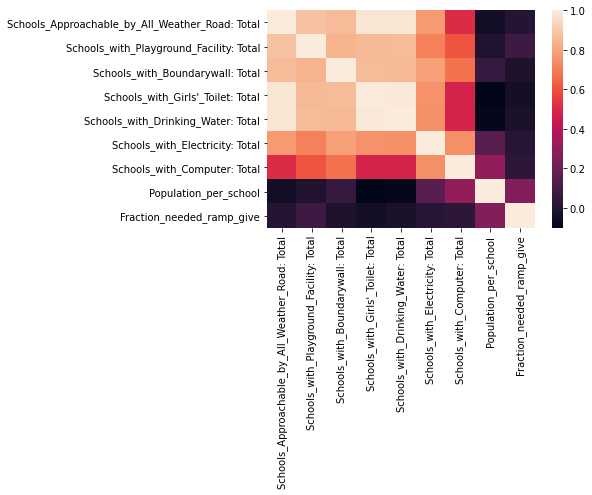

In [74]:
sns.heatmap(District_wise_scaled.corr())

In [80]:
#Fitting the PCA algorithm with our Data
from sklearn.decomposition import pca
#pca = PCA().fit(District_wise_scaled)

C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [82]:

# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()


In [83]:
# fitting
scalar.fit(District_wise_scaled)
scaled_data = scalar.transform(District_wise_scaled)

In [84]:
pca = PCA().fit(District_wise_scaled)

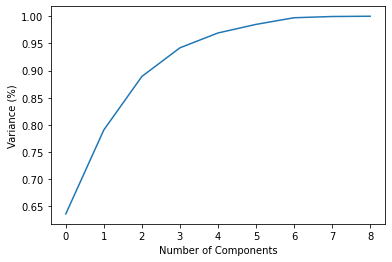

In [85]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
#plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [86]:
pca = PCA(n_components=2)
transformed_temp = pca.fit_transform(District_wise_scaled)

In [87]:
for_train = pd.DataFrame()
i=0
for name in ['1','2',]:
    for_train[name] = transformed_temp[:,i]
    i=i+1

In [88]:
for_train.head()

,1,2
0,-1.552184,-0.850464
1,-0.773093,-1.186055
2,-1.756969,-0.557558
3,-1.742441,-1.338393
4,-2.285801,-1.326439


<ipython-input-89-1dbfbea9a6b8>:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


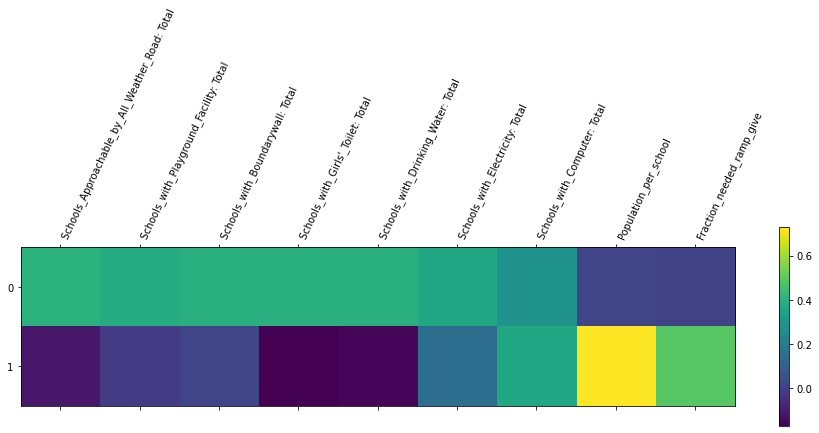

In [89]:
plt.matshow(pca.components_,cmap='viridis')
plt.colorbar()
plt.xticks(range(len(District_wise_scaled.columns)),District_wise_scaled.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

In [90]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [91]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

In [92]:
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(for_train) 
    kmeanModel.fit(for_train)     
      
    distortions.append(sum(np.min(cdist(for_train, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / for_train.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(for_train, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / for_train.shape[0] 
    mapping2[k] = kmeanModel.inertia_

In [93]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 2.225140730058568
2 : 1.6031442165268308
3 : 1.3442222644462252
4 : 1.1991189867402132
5 : 1.0550180303722323
6 : 1.007173779641587
7 : 0.9159270628537938
8 : 0.8539260405889697
9 : 0.819656100103023


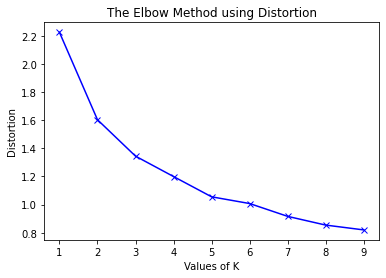

In [94]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [95]:
kmeanModel = KMeans(n_clusters=4).fit(for_train) 
kmeanModel.fit(for_train)  

KMeans(n_clusters=4)

In [96]:
y_kmeans = kmeanModel.predict(for_train)

Text(0, 0.5, 'Component 2')

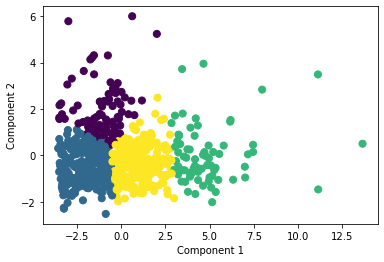

In [97]:
plt.scatter(for_train['1'], for_train['2'], c=y_kmeans, s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [108]:
District_wise = District_wise[District_wise['TOTPOPULAT'].notna()]

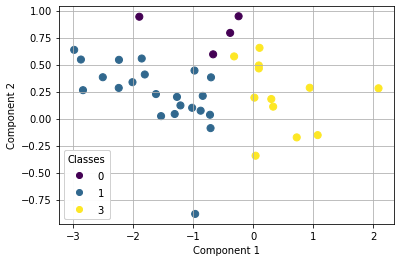

In [109]:
i=0
j=0
xaxis=[]
yaxis=[]
cc=[]
for state in District_wise['STATNAME'] :
    if state ==( 'BIHAR'):
        xaxis.append(for_train['1'][i])
        yaxis.append(for_train['2'][i])
        cc.append(y_kmeans[i])
    i=i+1
        
        
fig, ax = plt.subplots()

scatter = ax.scatter(xaxis, yaxis, c=cc, s=50)

legend1 = ax.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.xlabel('Component 1')
plt.ylabel('Component 2') 

plt.show()

Text(0, 0.5, 'Component 2')

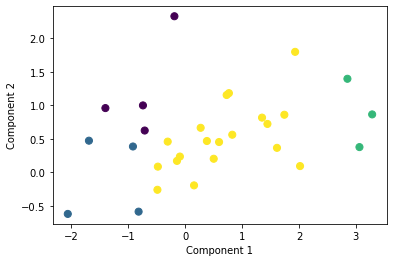

In [110]:
i=0
j=0
xaxis=[]
yaxis=[]
cc=[]
for state in District_wise['STATNAME'] :
    if state == 'TAMIL NADU':
        xaxis.append(for_train['1'][i])
        yaxis.append(for_train['2'][i])
        cc.append(y_kmeans[i])
    i=i+1
        
        
plt.scatter(xaxis, yaxis, c=cc, s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')   